In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [46]:
X_n,y_n = load_iris(return_X_y=True, as_frame=True)

In [48]:
X_n.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
86,6.7,3.1,4.7,1.5
113,5.7,2.5,5.0,2.0
110,6.5,3.2,5.1,2.0
61,5.9,3.0,4.2,1.5
0,5.1,3.5,1.4,0.2


In [50]:
X_n["Target"] = y_n
X_n.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
76,6.8,2.8,4.8,1.4,1
0,5.1,3.5,1.4,0.2,0


In [19]:
#taking only 10 Row for Trainning
df = X_n.sample(100)
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(10)
df_test = df.iloc[80:,:].sample(10)

In [20]:
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
135,7.7,3.0,6.1,2.3,2
65,6.7,3.1,4.4,1.4,1
82,5.8,2.7,3.9,1.2,1
113,5.7,2.5,5.0,2.0,2
109,7.2,3.6,6.1,2.5,2
124,6.7,3.3,5.7,2.1,2
127,6.1,3.0,4.9,1.8,2
78,6.0,2.9,4.5,1.5,1
106,4.9,2.5,4.5,1.7,2
120,6.9,3.2,5.7,2.3,2


In [21]:
df_val

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
29,4.7,3.2,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0
60,5.0,2.0,3.5,1.0,1
102,7.1,3.0,5.9,2.1,2
105,7.6,3.0,6.6,2.1,2
121,5.6,2.8,4.9,2.0,2
14,5.8,4.0,1.2,0.2,0
5,5.4,3.9,1.7,0.4,0
118,7.7,2.6,6.9,2.3,2
33,5.5,4.2,1.4,0.2,0


In [22]:
df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
63,6.1,2.9,4.7,1.4,1
70,5.9,3.2,4.8,1.8,1
10,5.4,3.7,1.5,0.2,0
7,5.0,3.4,1.5,0.2,0
69,5.6,2.5,3.9,1.1,1
50,7.0,3.2,4.7,1.4,1
27,5.2,3.5,1.5,0.2,0
24,4.8,3.4,1.9,0.2,0
97,6.2,2.9,4.3,1.3,1
44,5.1,3.8,1.9,0.4,0


In [24]:
X_test = df_val.iloc[:,:-1].values
y_test = df_val.iloc[:,-1].values
X_test

array([[4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5. , 2. , 3.5, 1. ],
       [7.1, 3. , 5.9, 2.1],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 2.8, 4.9, 2. ],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 4.2, 1.4, 0.2]])

## Bagging

In [25]:
#Case 1
df_bag = df_train.sample(16, replace=True)
X = df_bag.iloc[:,:-1].values
y = df_bag.iloc[:,-1].values
df_bag

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
65,6.7,3.1,4.4,1.4,1
135,7.7,3.0,6.1,2.3,2
111,6.4,2.7,5.3,1.9,2
72,6.3,2.5,4.9,1.5,1
127,6.1,3.0,4.9,1.8,2
109,7.2,3.6,6.1,2.5,2
65,6.7,3.1,4.4,1.4,1
135,7.7,3.0,6.1,2.3,2
106,4.9,2.5,4.5,1.7,2
124,6.7,3.3,5.7,2.1,2


In [28]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
#decision tree bag 1
dt_bag1 = DecisionTreeClassifier()

In [34]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

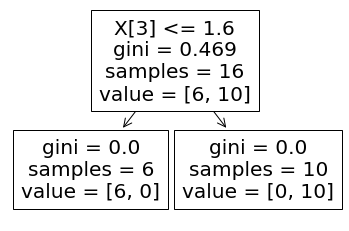

0.5


In [35]:
evaluate(dt_bag1,X,y)

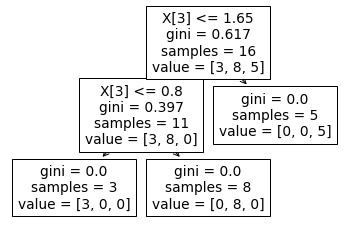

1.0


In [36]:
#Case 2
df_bag = df_train.sample(16, replace=True)
X = df_bag.iloc[:,:-1].values
y = df_bag.iloc[:,-1].values
df_bag
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

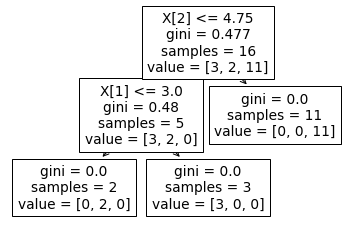

1.0


In [37]:
#Case 3
df_bag = df_train.sample(16, replace=True)
X = df_bag.iloc[:,:-1].values
y = df_bag.iloc[:,-1].values
df_bag
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predicting

In [38]:
df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
63,6.1,2.9,4.7,1.4,1
70,5.9,3.2,4.8,1.8,1
10,5.4,3.7,1.5,0.2,0
7,5.0,3.4,1.5,0.2,0
69,5.6,2.5,3.9,1.1,1
50,7.0,3.2,4.7,1.4,1
27,5.2,3.5,1.5,0.2,0
24,4.8,3.4,1.9,0.2,0
97,6.2,2.9,4.3,1.3,1
44,5.1,3.8,1.9,0.4,0


In [44]:
print("Prediction 1 : ", dt_bag1.predict(np.array([6.1,2.9,4.7,1.4]).reshape(1,4)))
print("Prediction 2 : ", dt_bag2.predict(np.array([6.1,2.9,4.7,1.4]).reshape(1,4)))
print("Prediction 3 : ", dt_bag3.predict(np.array([6.1,2.9,4.7,1.4]).reshape(1,4)))

Prediction 1 :  [1]
Prediction 2 :  [1]
Prediction 3 :  [1]


In [45]:
print("Prediction 1 : ", dt_bag1.predict(np.array([5.2,3.5,1.5,0.2]).reshape(1,4)))
print("Prediction 2 : ", dt_bag2.predict(np.array([5.2,3.5,1.5,0.2]).reshape(1,4)))
print("Prediction 3 : ", dt_bag3.predict(np.array([5.2,3.5,1.5,0.2]).reshape(1,4)))

Prediction 1 :  [1]
Prediction 2 :  [0]
Prediction 3 :  [0]


In [43]:
np.array([6.1,2.9,4.7,1.4]).reshape(1,4)

array([[6.1, 2.9, 4.7, 1.4]])

## Random subspaces

In [51]:
#taking only 10 Row for Trainning
df = X_n.sample(100)
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(10)
df_test = df.iloc[80:,:].sample(10)

In [57]:
df1 = df_train.sample(16)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
138,6.0,3.0,4.8,1.8,2
120,6.9,3.2,5.7,2.3,2
1,4.9,3.0,1.4,0.2,0
111,6.4,2.7,5.3,1.9,2
82,5.8,2.7,3.9,1.2,1
134,6.1,2.6,5.6,1.4,2
12,4.8,3.0,1.4,0.1,0
3,4.6,3.1,1.5,0.2,0
92,5.8,2.6,4.0,1.2,1
133,6.3,2.8,5.1,1.5,2


In [63]:
df1.iloc[:,:-1].sample(8,replace=True).sample(2,axis=1)

,petal length (cm),sepal width (cm)
133,5.1,2.8
117,6.7,3.8
117,6.7,3.8
133,5.1,2.8
17,1.4,3.5
133,5.1,2.8
17,1.4,3.5
109,6.1,3.6


In [64]:
df1.iloc[:,:-1].sample(8,replace=True).sample(2,axis=1)

,sepal width (cm),sepal length (cm)
124,3.3,6.7
111,2.7,6.4
82,2.7,5.8
133,2.8,6.3
120,3.2,6.9
92,2.6,5.8
134,2.6,6.1
124,3.3,6.7
